In [11]:
from trajectory import *

# Figure 8

In [12]:
t = TrajectoryTelemetry("data/tcr-0527-185058.csv")

## Trajectory vs Odometry End Pose

In [13]:
t.end_pose()

,traj_x,traj_y,odom_x,odom_y,odom_deg
821,3.0,0.0,3.39285,0.137935,87.870006


### Measured
- x error = 13 cm
- y error = 0 cm
- [video](https://vimeo.com/554960779) of trajectory
- [photo](https://strykeforce.smugmug.com/Software-Team/n-Wzm9GV/2021-Off-Season/i-j4RMfGF/A) of end pose measurement

## Trajectory and Odometry

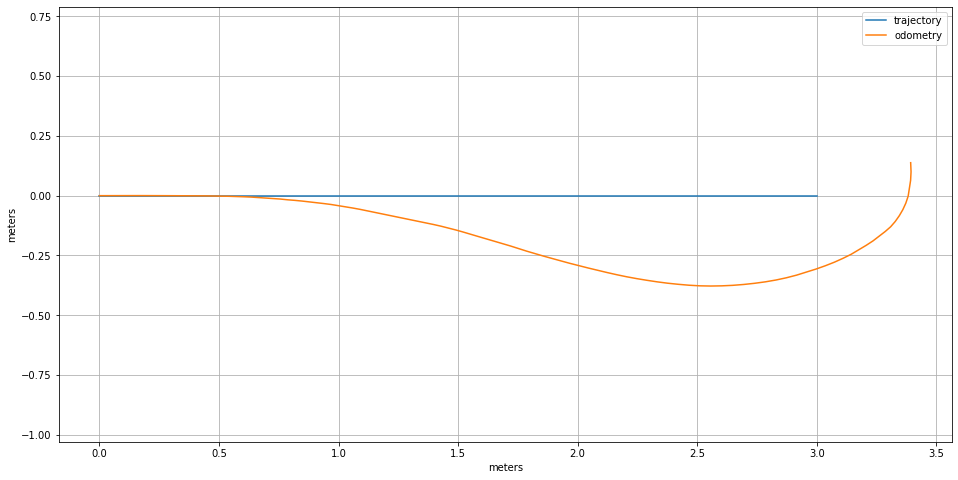

In [14]:
interval = t.make_interval() #start=5200)
_, ax = plt.subplots(1, 1, figsize=(16,8))
ax.set_aspect("equal", "datalim")
t.plot_trajectory(ax=ax, interval=interval)


## Trajectory and Holonomic Controller Velocity

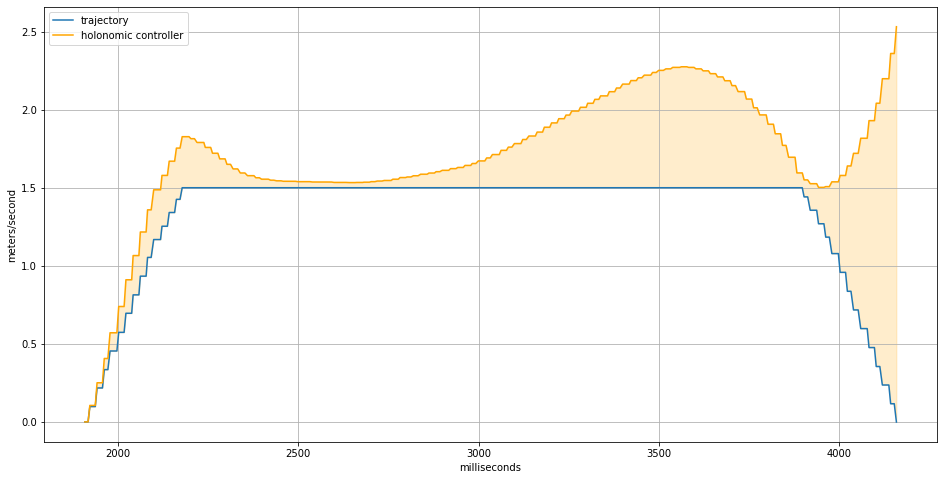

In [15]:
_, ax = plt.subplots(1, 1, figsize=(16, 8))
t.plot_velocity(ax=ax, controller=True, setpoint=False, drive=False, interval=interval)


## Trajectory vs Odometry Pose XY Error

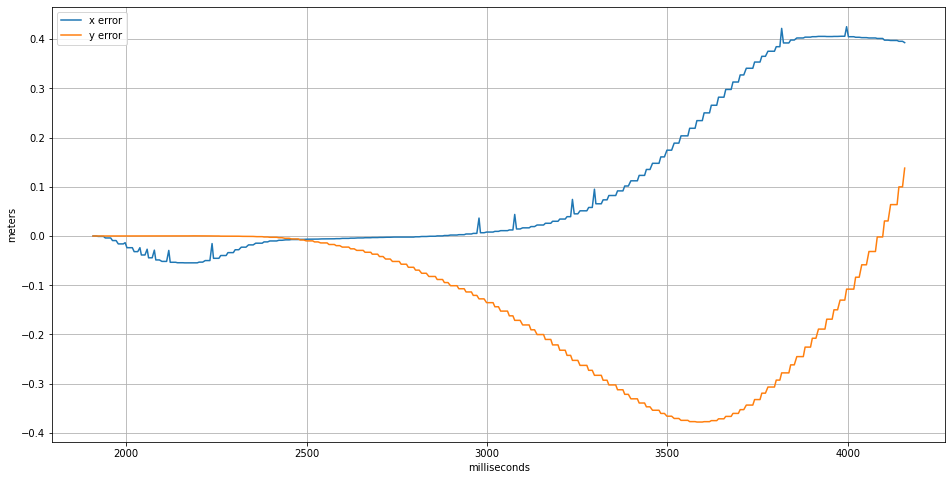

In [16]:
_, ax = plt.subplots(1, 1, figsize=(16, 8))
t.plot_error(ax=ax, interval=interval)

## Drive Setpoint vs Output

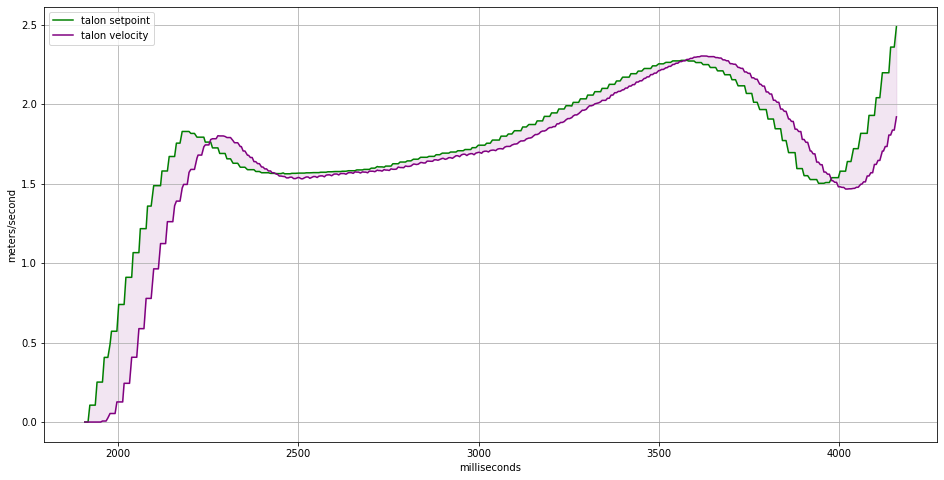

In [17]:
_, ax1 = plt.subplots(1, 1, figsize=(16, 8), sharex=True)
t.plot_velocity(controller=False, trajectory=False, ax=ax1)

## Pose Angle Error

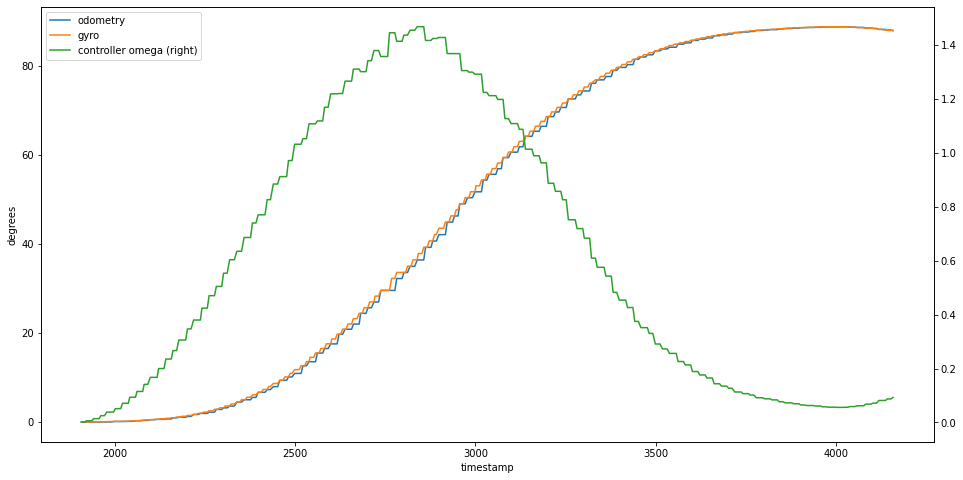

In [18]:
_, ax1 = plt.subplots(1, 1, figsize=(16,8))
t.plot_yaw(ax=ax1, gyro=True)

## Trajectory Start Delay

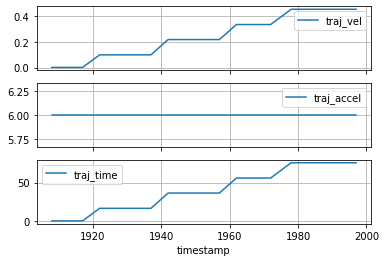

In [19]:
_, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
interval = t.make_interval(end=2000)
t.df[interval].plot(x='timestamp', y='traj_vel', ax=ax1)
t.df[interval].plot(x='timestamp', y='traj_accel', ax=ax2)
t.df[interval].plot(x='timestamp', y='traj_time', ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()

## Telemetry Packet Interval Jitter

count    451.000000
mean       4.988914
std        0.907921
min        0.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       11.000000
Name: timestamp, dtype: float64


<AxesSubplot:ylabel='Frequency'>

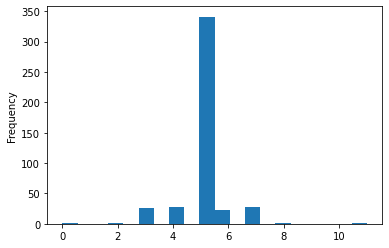

In [20]:
print(t.df[t.interval]['timestamp'].diff().describe())
t.df[t.interval]['timestamp'].diff().plot.hist(bins=20)